# Import Libraries

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [59]:
df_100 = pd.read_csv('flights_sample_100k.csv/flights_sample_100k.csv')
df_100.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-03-01,Allegiant Air,Allegiant Air: G4,G4,20368,1668,PGD,"Punta Gorda, FL",SPI,"Springfield, IL",...,0.0,160.0,138.0,122.0,994.0,NaN,NaN,NaN,NaN,NaN
1,2021-02-16,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2437,DFW,"Dallas/Fort Worth, TX",LAX,"Los Angeles, CA",...,0.0,211.0,NaN,NaN,1235.0,NaN,NaN,NaN,NaN,NaN
2,2022-04-12,PSA Airlines Inc.,PSA Airlines Inc.: OH,OH,20397,5560,EWN,"New Bern/Morehead/Beaufort, NC",CLT,"Charlotte, NC",...,0.0,79.0,78.0,51.0,221.0,NaN,NaN,NaN,NaN,NaN
3,2021-10-13,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1944,ABQ,"Albuquerque, NM",DEN,"Denver, CO",...,0.0,80.0,71.0,49.0,349.0,10.0,0.0,0.0,0.0,6.0
4,2022-06-05,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3081,PIT,"Pittsburgh, PA",STL,"St. Louis, MO",...,0.0,105.0,100.0,82.0,554.0,NaN,NaN,NaN,NaN,NaN


In [60]:
df_100[df_100['CANCELLED'] == 1] #flights that got cancelled

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
1,2021-02-16,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2437,DFW,"Dallas/Fort Worth, TX",LAX,"Los Angeles, CA",...,0.0,211.0,NaN,NaN,1235.0,NaN,NaN,NaN,NaN,NaN
105,2023-02-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,295,SAT,"San Antonio, TX",LAS,"Las Vegas, NV",...,0.0,175.0,NaN,NaN,1069.0,NaN,NaN,NaN,NaN,NaN
106,2020-12-30,Envoy Air,Envoy Air: MQ,MQ,20398,3975,MSP,"Minneapolis, MN",DFW,"Dallas/Fort Worth, TX",...,0.0,180.0,NaN,NaN,852.0,NaN,NaN,NaN,NaN,NaN
120,2021-10-31,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,61,YAK,"Yakutat, AK",CDV,"Cordova, AK",...,0.0,49.0,NaN,NaN,213.0,NaN,NaN,NaN,NaN,NaN
131,2019-06-17,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1792,CVG,"Cincinnati, OH",DFW,"Dallas/Fort Worth, TX",...,0.0,147.0,NaN,NaN,812.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99876,2022-04-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2399,FLL,"Fort Lauderdale, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,203.0,NaN,NaN,1119.0,NaN,NaN,NaN,NaN,NaN
99878,2020-03-23,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,5939,SFO,"San Francisco, CA",MMH,"Mammoth Lakes, CA",...,0.0,78.0,NaN,NaN,193.0,NaN,NaN,NaN,NaN,NaN
99899,2020-09-01,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,878,DAL,"Dallas, TX",IND,"Indianapolis, IN",...,0.0,125.0,NaN,NaN,755.0,NaN,NaN,NaN,NaN,NaN
99920,2022-01-04,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,204,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",...,0.0,90.0,NaN,NaN,337.0,NaN,NaN,NaN,NaN,NaN


In [61]:
delay_cols = ['DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 
               'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 
               'DELAY_DUE_LATE_AIRCRAFT']

df_100[delay_cols] = df_100[delay_cols].fillna(0)

In [62]:
df_100.isnull().sum()  #missing values

FL_DATE                        0
AIRLINE                        0
AIRLINE_DOT                    0
AIRLINE_CODE                   0
DOT_CODE                       0
FL_NUMBER                      0
ORIGIN                         0
ORIGIN_CITY                    0
DEST                           0
DEST_CITY                      0
CRS_DEP_TIME                   0
DEP_TIME                    2576
DEP_DELAY                   2577
TAXI_OUT                    2618
WHEELS_OFF                  2618
WHEELS_ON                   2655
TAXI_IN                     2655
CRS_ARR_TIME                   0
ARR_TIME                    2655
ARR_DELAY                   2852
CANCELLED                      0
CANCELLATION_CODE          97373
DIVERTED                       0
CRS_ELAPSED_TIME               0
ELAPSED_TIME                2852
AIR_TIME                    2852
DISTANCE                       0
DELAY_DUE_CARRIER              0
DELAY_DUE_WEATHER              0
DELAY_DUE_NAS                  0
DELAY_DUE_

# Using an AutoEDA

In [63]:
# pip install ydata-profiling -q

In [64]:
# import pandas as pd
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df_100, title="Pandas Profiling Report")
# profile.to_file("output_report.json")

# Data Preprocessing

After I went through the dataset, there are some columns that I think are not useful since our target is the Arrival delay time.

## Outlier detection and deletion

Some features have extreme outliers, here we decide to delete those outliers, especially in DEP_DELAY, TAXI_OUT, TAXI_IN,ARR_DELAY

In [65]:
def remove_outliers_iqr(dataframe):
    df = dataframe.copy()
    
    numeric_cols = df.select_dtypes(include='number').columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter rows where values are within bounds
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    # Print how many rows were removed
    rows_removed = len(dataframe) - len(df)
    print(f"Removed {rows_removed} rows containing outliers")
    
    return df

df = remove_outliers_iqr(df_100)

Removed 33788 rows containing outliers


## Convert Time

Cyclical encoding is a technique used in machine learning to represent cyclical features, such as time, in a way that preserves their inherent periodic nature. This is particularly important for features like hours of the day, days of the week, or months of the year, where the end of the cycle wraps around to the beginning (e.g., after 23:00 comes 00:00).

**Why Use Cyclical Encoding?**

1. Preserves Relationships: In a standard numerical representation, the distance between values at the ends of the cycle (e.g., 23:00 and 00:00) would be large (23 units apart), which does not reflect their actual closeness in time. Cyclical encoding helps to maintain this relationship.

2. Improves Model Performance: Many machine learning algorithms, especially linear models, can misinterpret the cyclical nature of time if it is not encoded properly. Cyclical encoding can lead to better model performance by providing a more accurate representation of the data.

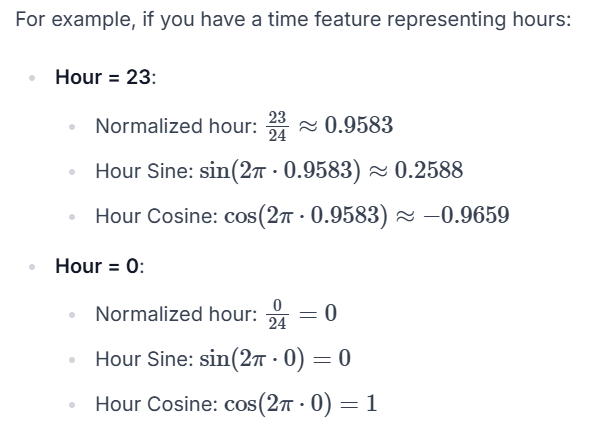

In [66]:
import pandas as pd
import numpy as np

def cyclical_encoding(t):
    """Return sine and cosine transformations for time in HHMM format."""
    if pd.isnull(t):
        return np.nan, np.nan, np.nan, np.nan  # Return NaN for sine and cosine if input is NaN
    else:
        t = int(t)
        hour = t // 100
        minute = t % 100
        
        # Normalize hour and minute
        hour_norm = hour / 24
        minute_norm = minute / 60
        
        # Calculate sine and cosine for cyclical encoding
        hour_sin = np.sin(2 * np.pi * hour_norm)
        hour_cos = np.cos(2 * np.pi * hour_norm)
        minute_sin = np.sin(2 * np.pi * minute_norm)
        minute_cos = np.cos(2 * np.pi * minute_norm)
        
        return hour_sin, hour_cos, minute_sin, minute_cos

# List of original time columns to convert
time_columns = ['CRS_DEP_TIME', 'CRS_ARR_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'DEP_TIME', 'ARR_TIME']

# Process each time column
for col in time_columns:
    if col in df.columns:
        # Apply cyclical encoding
        df[[f'{col}_HOUR_SIN', f'{col}_HOUR_COS', f'{col}_MINUTE_SIN', f'{col}_MINUTE_COS']] = df[col].apply(
            lambda x: pd.Series(cyclical_encoding(x))
        )
    else:
        print(f"Column {col} not found in DataFrame")

In [67]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,WHEELS_ON_MINUTE_SIN,WHEELS_ON_MINUTE_COS,DEP_TIME_HOUR_SIN,DEP_TIME_HOUR_COS,DEP_TIME_MINUTE_SIN,DEP_TIME_MINUTE_COS,ARR_TIME_HOUR_SIN,ARR_TIME_HOUR_COS,ARR_TIME_MINUTE_SIN,ARR_TIME_MINUTE_COS
0,2019-03-01,Allegiant Air,Allegiant Air: G4,G4,20368,1668,PGD,"Punta Gorda, FL",SPI,"Springfield, IL",...,-0.104528,-0.994522,1.000000,6.123234e-17,0.866025,-0.500000,0.965926,-2.588190e-01,-0.743145,-6.691306e-01
2,2022-04-12,PSA Airlines Inc.,PSA Airlines Inc.: OH,OH,20397,5560,EWN,"New Bern/Morehead/Beaufort, NC",CLT,"Charlotte, NC",...,0.500000,-0.866025,1.000000,6.123234e-17,0.951057,-0.309017,0.965926,-2.588190e-01,-0.587785,-8.090170e-01
4,2022-06-05,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3081,PIT,"Pittsburgh, PA",STL,"St. Louis, MO",...,0.809017,0.587785,0.965926,2.588190e-01,-0.500000,-0.866025,1.000000,6.123234e-17,1.000000,6.123234e-17
5,2019-10-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,674,LAX,"Los Angeles, CA",SEA,"Seattle, WA",...,0.500000,0.866025,0.258819,-9.659258e-01,-0.743145,-0.669131,-0.500000,-8.660254e-01,0.994522,-1.045285e-01
7,2020-02-06,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1779,SFO,"San Francisco, CA",SAN,"San Diego, CA",...,-0.406737,0.913545,-0.258819,-9.659258e-01,-0.743145,-0.669131,-0.500000,-8.660254e-01,-0.104528,9.945219e-01


In [68]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'CRS_DEP_TIME_HOUR_SIN',
       'CRS_DEP_TIME_HOUR_COS', 'CRS_DEP_TIME_MINUTE_SIN',
       'CRS_DEP_TIME_MINUTE_COS', 'CRS_ARR_TIME_HOUR_SIN',
       'CRS_ARR_TIME_HOUR_COS', 'CRS_ARR_TIME_MINUTE_SIN',
       'CRS_ARR_TIME_MINUTE_COS', 'WHEELS_OFF_HOUR_SIN', 'WHEELS_OFF_HOUR_COS',
       'WHEELS_OFF_MINUTE_SIN', 'WHEELS_OFF_MINUTE_COS', 'WHEELS_ON_HOUR_SIN',
       'WHEELS_ON_HOUR_COS', 'WHEELS_ON_MINUTE_SIN', 'WHEELS_ON_MINUTE_COS',
       'DEP_TIME_HOUR_SIN', 'DEP_TIM

## Scaling

Scaling will be executed if needed, since logically speaking, scaling wouldn't do any good, because our target, arrival delay will be affected.

In [69]:
# df['TAXI_IN'] = df['CRS_DEP_TIME'].apply(convert_time)
# df['TAXI_OUT'] = df['CRS_DEP_TIME'].apply(convert_time)

## Making 2 new columns, which are the States of destination and departure

In [70]:
import pandas as pd

def split_and_overwrite_city_state(df, column_names):
    """Splits columns like 'DEST_CITY' into 'dest_city' and 'dest_state' (no redundant naming)."""
    df = df.copy()
    
    for column_name in column_names:
        # Extract base name ('DEST' → 'dest')
        base_name = column_name.split('_')[0].lower()
        
        # Split city and state (e.g., "New York, NY" → ["New York", "NY"])
        split_result = df[column_name].str.split(r'\s*,\s*', n=1, expand=True)
        
        # Replace original column with clean city name
        df[column_name] = split_result[0].str.strip()
        
        # Add new state column
        if split_result.shape[1] > 1:
            df[f"{base_name}_state"] = split_result[1].str.strip()
        else:
            df[f"{base_name}_state"] = None  # or np.nan
    
    return df

# Example usage:
df = split_and_overwrite_city_state(df, ['DEST_CITY', 'ORIGIN_CITY'])
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DEP_TIME_HOUR_SIN,DEP_TIME_HOUR_COS,DEP_TIME_MINUTE_SIN,DEP_TIME_MINUTE_COS,ARR_TIME_HOUR_SIN,ARR_TIME_HOUR_COS,ARR_TIME_MINUTE_SIN,ARR_TIME_MINUTE_COS,dest_state,origin_state
0,2019-03-01,Allegiant Air,Allegiant Air: G4,G4,20368,1668,PGD,Punta Gorda,SPI,Springfield,...,1.000000,6.123234e-17,0.866025,-0.500000,0.965926,-2.588190e-01,-0.743145,-6.691306e-01,IL,FL
2,2022-04-12,PSA Airlines Inc.,PSA Airlines Inc.: OH,OH,20397,5560,EWN,New Bern/Morehead/Beaufort,CLT,Charlotte,...,1.000000,6.123234e-17,0.951057,-0.309017,0.965926,-2.588190e-01,-0.587785,-8.090170e-01,NC,NC
4,2022-06-05,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,3081,PIT,Pittsburgh,STL,St. Louis,...,0.965926,2.588190e-01,-0.500000,-0.866025,1.000000,6.123234e-17,1.000000,6.123234e-17,MO,PA
5,2019-10-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,674,LAX,Los Angeles,SEA,Seattle,...,0.258819,-9.659258e-01,-0.743145,-0.669131,-0.500000,-8.660254e-01,0.994522,-1.045285e-01,WA,CA
7,2020-02-06,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1779,SFO,San Francisco,SAN,San Diego,...,-0.258819,-9.659258e-01,-0.743145,-0.669131,-0.500000,-8.660254e-01,-0.104528,9.945219e-01,CA,CA


In [71]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'CRS_DEP_TIME_HOUR_SIN',
       'CRS_DEP_TIME_HOUR_COS', 'CRS_DEP_TIME_MINUTE_SIN',
       'CRS_DEP_TIME_MINUTE_COS', 'CRS_ARR_TIME_HOUR_SIN',
       'CRS_ARR_TIME_HOUR_COS', 'CRS_ARR_TIME_MINUTE_SIN',
       'CRS_ARR_TIME_MINUTE_COS', 'WHEELS_OFF_HOUR_SIN', 'WHEELS_OFF_HOUR_COS',
       'WHEELS_OFF_MINUTE_SIN', 'WHEELS_OFF_MINUTE_COS', 'WHEELS_ON_HOUR_SIN',
       'WHEELS_ON_HOUR_COS', 'WHEELS_ON_MINUTE_SIN', 'WHEELS_ON_MINUTE_COS',
       'DEP_TIME_HOUR_SIN', 'DEP_TIM

## Making Weekdays, Weekends, and Days name from dates

In [72]:
   import pandas as pd

   def add_weekday_weekend_columns(df, date_columns):
       """Adds weekday name, and weekend boolean for each date column.
       Args:
           df (pd.DataFrame): Input DataFrame.
           date_columns (list): List of column names containing dates.
       Returns:
           pd.DataFrame: DataFrame with added day-related columns.
       """
       df = df.copy()
       
       for col in date_columns:
           # Ensure column is in datetime format
           if not pd.api.types.is_datetime64_any_dtype(df[col]):
               df[col] = pd.to_datetime(df[col], errors='coerce')
           
           # Add Day Name (e.g., 'Monday')
           df[f'{col}_day_name'] = df[col].dt.day_name()
           
           # Add Weekend Boolean (True if Saturday/Sunday)
           df[f'{col}_is_weekend'] = df[col].dt.dayofweek.isin([5, 6])  # 5=Sat, 6=Sun
       
       return df

   # Example Usage
   df = add_weekday_weekend_columns(df, ['FL_DATE'])
   

## Encoding for Categorical Data

1. One-Hot Encoding
* Use Case: Best for nominal data (categories without an inherent order).
* Description: Creates a new binary column for each category, indicating the presence (1) or absence (0) of that category.

2. Label Encoding
* Use Case: Suitable for ordinal data (categories with a defined order).
* Description: Assigns a unique integer to each category, which can imply an order.

3. Ordinal Encoding
* Use Case: Specifically for ordinal data where the order matters.
* Description: Converts categories into integers while preserving the order.

4. Binary Encoding
* Use Case: Effective for high cardinality features (many unique categories).
* Description: Converts categories into binary digits, reducing dimensionality compared to one-hot encoding.
  
5. Target Encoding
* Use Case: Useful when there is a relationship between the categorical feature and the target variable.
* Description: Replaces categories with the mean of the target variable for that category.

In [73]:
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# --- Encoding Strategy ---
# 1. Ordinal Encoding for FL_DATE_day_name (ordered categories)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordinal_enc = OrdinalEncoder(categories=[day_order])
df['FL_DATE_day_name_encoded'] = ordinal_enc.fit_transform(df[['FL_DATE_day_name']])

# 2. One-Hot Encoding for AIRLINE (nominal)
onehot_enc = OneHotEncoder(sparse_output=False)
airline_encoded = onehot_enc.fit_transform(df[['AIRLINE']])
airline_columns = [f'AIRLINE_{cat}' for cat in onehot_enc.categories_[0]]
df[airline_columns] = airline_encoded

# 3. Binary Encoding for high-cardinality columns (FL_NUMBER, ORIGIN, etc.)
binary_enc = ce.BinaryEncoder(cols=['FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'dest_state', 'origin_state'])
df = binary_enc.fit_transform(df)

# --- Cleanup ---
df = df.drop(columns=['FL_DATE_day_name', 'AIRLINE'])

In [74]:
df.head()

,FL_DATE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER_0,FL_NUMBER_1,FL_NUMBER_2,FL_NUMBER_3,FL_NUMBER_4,FL_NUMBER_5,...,AIRLINE_Hawaiian Airlines Inc.,AIRLINE_Horizon Air,AIRLINE_JetBlue Airways,AIRLINE_Mesa Airlines Inc.,AIRLINE_PSA Airlines Inc.,AIRLINE_Republic Airline,AIRLINE_SkyWest Airlines Inc.,AIRLINE_Southwest Airlines Co.,AIRLINE_Spirit Air Lines,AIRLINE_United Air Lines Inc.
0,2019-03-01,Allegiant Air: G4,G4,20368,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-04-12,PSA Airlines Inc.: OH,OH,20397,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2022-06-05,Southwest Airlines Co.: WN,WN,19393,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2019-10-06,Delta Air Lines Inc.: DL,DL,19790,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-02-06,Southwest Airlines Co.: WN,WN,19393,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
df.columns

Index(['FL_DATE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'FL_NUMBER_0',
       'FL_NUMBER_1', 'FL_NUMBER_2', 'FL_NUMBER_3', 'FL_NUMBER_4',
       'FL_NUMBER_5',
       ...
       'AIRLINE_Hawaiian Airlines Inc.', 'AIRLINE_Horizon Air',
       'AIRLINE_JetBlue Airways', 'AIRLINE_Mesa Airlines Inc.',
       'AIRLINE_PSA Airlines Inc.', 'AIRLINE_Republic Airline',
       'AIRLINE_SkyWest Airlines Inc.', 'AIRLINE_Southwest Airlines Co.',
       'AIRLINE_Spirit Air Lines', 'AIRLINE_United Air Lines Inc.'],
      dtype='object', length=115)

## Exclude some Columns

Some Columns need to be exluded for some reasons, for example not useful to the target variable or redundant (as some variables are represented only in 1 variables, e.g. airline code)

In [76]:
columns_to_exclude = [
    'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE', 'CANCELLED', 
    'CANCELLATION_CODE', 'DIVERTED', 'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]
# Drop the specified columns
df = df.drop(columns=columns_to_exclude)

In [77]:
df.head()

,FL_DATE,FL_NUMBER_0,FL_NUMBER_1,FL_NUMBER_2,FL_NUMBER_3,FL_NUMBER_4,FL_NUMBER_5,FL_NUMBER_6,FL_NUMBER_7,FL_NUMBER_8,...,AIRLINE_Hawaiian Airlines Inc.,AIRLINE_Horizon Air,AIRLINE_JetBlue Airways,AIRLINE_Mesa Airlines Inc.,AIRLINE_PSA Airlines Inc.,AIRLINE_Republic Airline,AIRLINE_SkyWest Airlines Inc.,AIRLINE_Southwest Airlines Co.,AIRLINE_Spirit Air Lines,AIRLINE_United Air Lines Inc.
0,2019-03-01,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-04-12,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2022-06-05,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2019-10-06,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-02-06,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [78]:
df.columns

Index(['FL_DATE', 'FL_NUMBER_0', 'FL_NUMBER_1', 'FL_NUMBER_2', 'FL_NUMBER_3',
       'FL_NUMBER_4', 'FL_NUMBER_5', 'FL_NUMBER_6', 'FL_NUMBER_7',
       'FL_NUMBER_8',
       ...
       'AIRLINE_Hawaiian Airlines Inc.', 'AIRLINE_Horizon Air',
       'AIRLINE_JetBlue Airways', 'AIRLINE_Mesa Airlines Inc.',
       'AIRLINE_PSA Airlines Inc.', 'AIRLINE_Republic Airline',
       'AIRLINE_SkyWest Airlines Inc.', 'AIRLINE_Southwest Airlines Co.',
       'AIRLINE_Spirit Air Lines', 'AIRLINE_United Air Lines Inc.'],
      dtype='object', length=104)

In [80]:
df.to_csv('encoded_flight_data.csv', index=False)

In [81]:
def get_feature_target_split(df):
    X = df.drop(columns=['ARR_DELAY'])
    y = df['ARR_DELAY']
    return X, y

In [82]:
def get_top_features(X, y, top_n=20):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)
    importances = rf.feature_importances_
    feat_names = X.columns
    feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
    feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
    top_features = feat_imp_df['Feature'].head(top_n).tolist()
    return top_features

In [83]:
def filter_top_features(X, top_features):
    return X[top_features]

In [86]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

def get_feature_importance(X: pd.DataFrame, y: pd.Series, top_n: int = 20):
    """
    Trains a RandomForest on numeric features and returns top-N important features.
    Drops any non-numeric columns that can cause fitting issues.
    """
    # Drop non-numeric columns
    X_numeric = X.select_dtypes(include=[np.number])

    print(f"Dropped {X.shape[1] - X_numeric.shape[1]} non-numeric columns.")

    # Fit Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_numeric, y)

    # Get importances
    importances = rf.feature_importances_
    feature_names = X_numeric.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    return importance_df.head(top_n)

In [88]:
top_features = get_feature_importance(X, y, top_n=30)
print(top_features)


Dropped 4 non-numeric columns.
                     Feature  Importance
33                 DEP_DELAY    0.289115
40          CRS_ELAPSED_TIME    0.245852
41              ELAPSED_TIME    0.238343
34                  TAXI_OUT    0.080747
42                  AIR_TIME    0.028048
37                   TAXI_IN    0.012255
50   CRS_ARR_TIME_MINUTE_SIN    0.006814
51   CRS_ARR_TIME_MINUTE_COS    0.006554
67       ARR_TIME_MINUTE_COS    0.005112
66       ARR_TIME_MINUTE_SIN    0.004963
43                  DISTANCE    0.004640
58      WHEELS_ON_MINUTE_SIN    0.004158
59      WHEELS_ON_MINUTE_COS    0.004067
55     WHEELS_OFF_MINUTE_COS    0.002694
54     WHEELS_OFF_MINUTE_SIN    0.002519
63       DEP_TIME_MINUTE_COS    0.002381
75            origin_state_1    0.002352
62       DEP_TIME_MINUTE_SIN    0.002328
80  FL_DATE_day_name_encoded    0.002271
46   CRS_DEP_TIME_MINUTE_SIN    0.002092
47   CRS_DEP_TIME_MINUTE_COS    0.001979
38              CRS_ARR_TIME    0.001951
82     AIRLINE_Allegiant A